**Obervable Trends - News Mood**

1) CBS is the most positive news source

2) CNN and Fox news tend to have a more negative sentiment

3) New York Times is the most neutral

In [38]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import json
from datetime import datetime
from btwitenv import (consumer_key, consumer_secret, 
                    access_token, access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

#Setup Vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [39]:
#For Loop to Create DataFrame for all News Sources

target_users = ("@BBC","@CBS","@CNN","@FoxNews","@nytimes")
sentiment = []
sentiment_df = []

#Loop through News Outlets
for user in target_users:
    oldest_tweet = None
    counter = 1
    try:
        public_tweets = api.user_timeline(user,
                                          count=100,
                                          result_type = "recent",
                                          max_id=oldest_tweet)

    # Loop through all tweets
        for tweet in public_tweets:   
            time= tweet["created_at"]
            text = tweet["text"]
            results = analyzer.polarity_scores(tweet["text"])
            results["user"] = user
            results["date"] = datetime.strptime(time,'%a %b %d %H:%M:%S %z %Y').date()
            results["time"] = time
            results["Tweets Ago"] = counter
            
            sentiment.append(results)
            
            counter += 1
            
        oldest_tweet = int(tweet['id_str']) - 1

    except tweepy.TweepError:
        print("Failed to run the command on that user, Skipping...")
    continue
#create DataFrame and save to csv    
sentiment_df = pd.DataFrame(sentiment)
sentiment_df.to_csv("sentiment_df.csv", index=False)
sentiment_df.head()

,Tweets Ago,compound,date,neg,neu,pos,time,user
0,1,0.6249,2018-03-03,0.000,0.745,0.255,Sat Mar 03 21:21:40 +0000 2018,@BBC
1,2,0.2960,2018-03-03,0.000,0.833,0.167,Sat Mar 03 19:36:06 +0000 2018,@BBC
2,3,0.1695,2018-03-03,0.110,0.720,0.170,Sat Mar 03 19:00:05 +0000 2018,@BBC
3,4,-0.7717,2018-03-03,0.271,0.729,0.000,Sat Mar 03 18:00:16 +0000 2018,@BBC
4,5,0.0000,2018-03-03,0.000,1.000,0.000,Sat Mar 03 17:58:00 +0000 2018,@BBC


In [40]:
#Create DataFrame for each news source
def news_frame(handle):
    return sentiment_df.loc[sentiment_df["user"] == handle]

BBC_df = news_frame('@BBC') 
CBS_df = news_frame('@CBS')
CNN_df = news_frame('@CNN')
Fox_df = news_frame('@FoxNews')
NYT_df = news_frame('@nytimes')

<function matplotlib.pyplot.show>

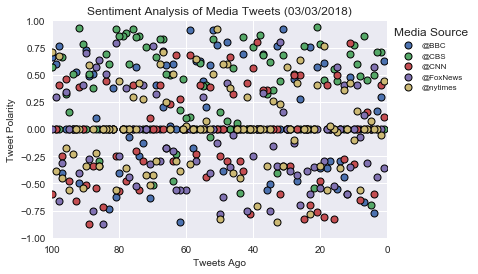

In [41]:
#Create Scatter Plot
def plot_scatter(handle):
    return plt.scatter(x=handle["Tweets Ago"],
            y=handle["compound"],
            edgecolors = "black",
            marker = 'o',
            linewidth = 1.0)

plot_scatter(BBC_df)
plot_scatter(CBS_df)
plot_scatter(CNN_df)
plot_scatter(Fox_df)
plot_scatter(NYT_df)
plt.legend(target_users, 
           title = ("Media Source"), 
           loc = 'best', 
           bbox_to_anchor = (1,1),
           fancybox = True,
           fontsize = 8)
plt.xlim(100,0)
plt.ylim(-1,1)
plt.title("Sentiment Analysis of Media Tweets (03/03/2018)")
plt.xlabel("Tweets Ago", fontsize=10)
plt.ylabel("Tweet Polarity", fontsize=10)
sns.set()
plt.savefig("Tweet_Sentiment.png")
plt.show

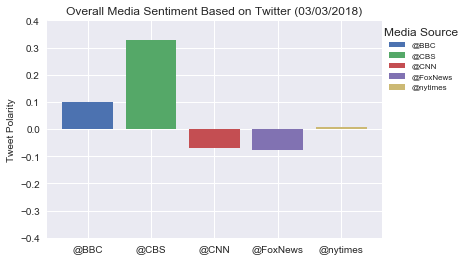

In [42]:
#Create Bar Chart
def plot_bar(handle):
    return plt.bar(x=handle["user"],
            height=handle["compound"].mean())

plot_bar(BBC_df)
plot_bar(CBS_df)
plot_bar(CNN_df)
plot_bar(Fox_df)
plot_bar(NYT_df)


plt.ylim(-0.4,0.4)
plt.title("Overall Media Sentiment Based on Twitter (03/03/2018)")
plt.legend(target_users, 
           title = ("Media Source"), 
           loc = 'best', 
           bbox_to_anchor = (1.25,1),
           fancybox = True,
           fontsize = 8)
plt.ylabel("Tweet Polarity", fontsize=10)
plt.savefig("Source_Sentiment")
sns.set()